<a href="https://colab.research.google.com/github/Manisha0597/Customer-Sentiment-Alert/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚨 Customer Sentiment Alert (CSA Agent)


In [1]:
# Step 1: Install dependencies
!pip install transformers scikit-learn

In [3]:
# Step 2: Full CSA Agent code
from transformers import pipeline
import math

# Initialize Sentiment Pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Functions
def analyze_sentiment(text):
    res = sentiment_pipeline(text)[0]
    return {'label': res['label'], 'score': float(res['score'])}

def urgency_score(sentiment, reach=1, is_mention=False):
    label = sentiment.get('label', 'NEUTRAL').upper()
    score = sentiment.get('score', 0.0)
    base = 0.0
    if label in ('NEGATIVE','LABEL_0','NEG'):
        base = 0.6 + 0.4*score
    elif label in ('POSITIVE','LABEL_1','POS'):
        base = 0.1*score
    else:
        base = 0.2
    reach_factor = math.log1p(reach)/10.0
    mention_factor = 0.15 if is_mention else 0.0
    urgency = min(1.0, base + reach_factor + mention_factor)
    return round(urgency,3)

# Sample Feedbacks
feedbacks = [
    {'text':'I love the product, it\'s amazing!','reach':10,'is_mention':False},
    {'text':'This is terrible, I hate the service.','reach':150,'is_mention':True},
    {'text':'The app is okay, but it could be faster.','reach':50,'is_mention':False},
    {'text':'Support never responded to my issue, very disappointed!','reach':200,'is_mention':True},
]

# Run Demo
print('🚨 Customer Sentiment Alert\n')
for fb in feedbacks:
    sentiment = analyze_sentiment(fb['text'])
    urgency = urgency_score(sentiment, reach=fb['reach'], is_mention=fb['is_mention'])
    print(f"Feedback: {fb['text']}")
    print(f"Sentiment: {sentiment}")
    print(f"Urgency Score: {urgency}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


🚨 Customer Sentiment Alert

Feedback: I love the product, it's amazing!
Sentiment: {'label': 'POSITIVE', 'score': 0.9998868703842163}
Urgency Score: 0.34

Feedback: This is terrible, I hate the service.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9996768236160278}
Urgency Score: 1.0

Feedback: The app is okay, but it could be faster.
Sentiment: {'label': 'NEGATIVE', 'score': 0.7721087336540222}
Urgency Score: 1.0

Feedback: Support never responded to my issue, very disappointed!
Sentiment: {'label': 'NEGATIVE', 'score': 0.9987133741378784}
Urgency Score: 1.0



# Visualization


### 🚨 Customer Sentiment Alert Results Table


,Feedback,Sentiment,Urgency Score
0,"I love the product, it's amazing!",POSITIVE,0.34
1,"This is terrible, I hate the service.",NEGATIVE,1.00
2,"The app is okay, but it could be faster.",NEGATIVE,1.00
3,"Support never responded to my issue, very disa...",NEGATIVE,1.00


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


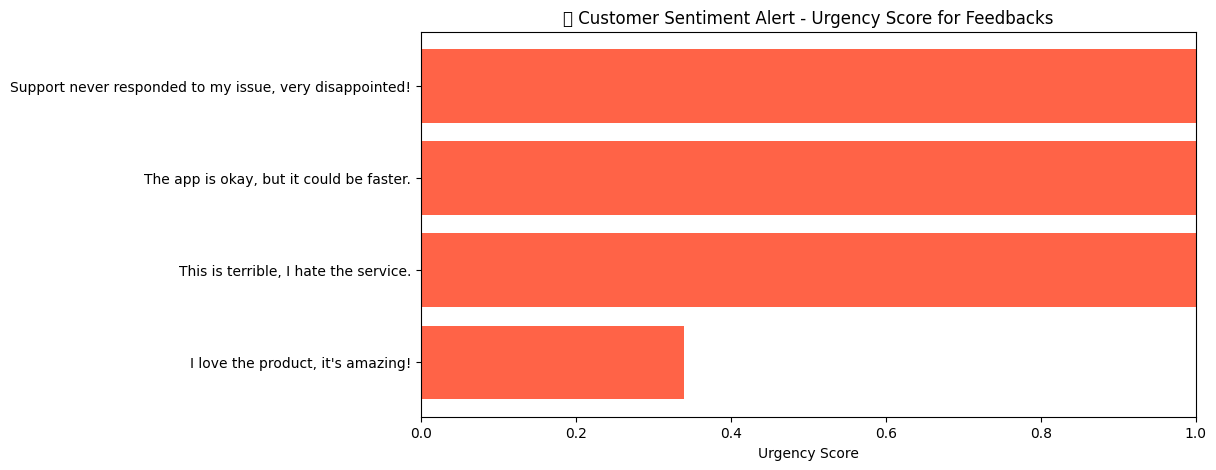

from matplotlib import pyplot as plt
df['Urgency Score'].plot(kind='hist', bins=20, title='Urgency Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Feedback').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Urgency Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Urgency Score'}, axis=1)
              .sort_values('Urgency Score', ascending=True))
  xs = counted['Urgency Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Urgency Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Urgency Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Urgency Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Urgency Score'}, axis=1)
              .sort_values('Urgency Score', ascending=True))
  xs = counted['Urgency Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Urgency Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Urgency Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Urgency Score'].plot(kind='line', figsize=(8, 4), title='Urgency Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in df.groupby('Feedback')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Feedback')
_ = plt.ylabel('Sentiment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Urgency Score', y='Feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Urgency Score', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Urgency Score'].plot(kind='hist', bins=20, title='Urgency Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('Feedback').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='Urgency Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Urgency Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Urgency Score'}, axis=1)
              .sort_values('Urgency Score', ascending=True))
  xs = counted['Urgency Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Urgency Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Urgency Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Urgency Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Urgency Score'}, axis=1)
              .sort_values('Urgency Score', ascending=True))
  xs = counted['Urgency Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Urgency Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Urgency Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Urgency Score'].plot(kind='line', figsize=(8, 4), title='Urgency Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_27.groupby('Feedback')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Feedback')
_ = plt.ylabel('Sentiment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='Feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='index', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Urgency Score', y='Feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Urgency Score', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
# Step 3: Visualize Results
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
data = []
for fb in feedbacks:
    sentiment = analyze_sentiment(fb['text'])
    urgency = urgency_score(sentiment, reach=fb['reach'], is_mention=fb['is_mention'])
    data.append({
        "Feedback": fb['text'],
        "Sentiment": sentiment['label'],
        "Urgency Score": urgency
    })

df = pd.DataFrame(data)

# Display Table
print("### 🚨 Customer Sentiment Alert Results Table")
display(df)

# Bar Chart
plt.figure(figsize=(10,5))
plt.barh(df['Feedback'], df['Urgency Score'], color='tomato')
plt.xlabel('Urgency Score')
plt.title('🚨 Customer Sentiment Alert - Urgency Score for Feedbacks')
plt.xlim(0,1.0)
plt.show()
